<a href="https://colab.research.google.com/github/Ferdous-Rahman/Big-dataset-handle/blob/main/Data%20mining%20Lab_Task_04_221902005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Run the provided Python on the Iris dataset and attach the saved plots to your lab report.

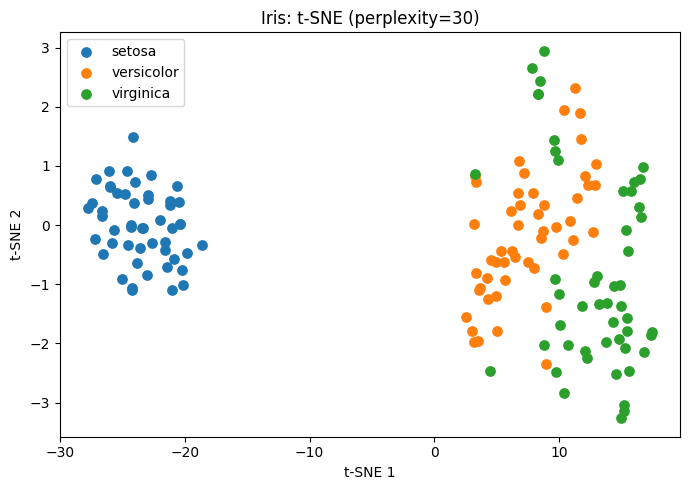

Saved: plots_q1/iris_tsne_perp30.png


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
OUT_DIR = "plots_q1"
os.makedirs(OUT_DIR, exist_ok=True)
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=30,
    init="pca",
    learning_rate="auto",
    random_state=42
)
X_2d = tsne.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
for cls in np.unique(y):
    plt.scatter(X_2d[y == cls, 0], X_2d[y == cls, 1], s=45, label=target_names[cls])
plt.title("Iris: t-SNE (perplexity=30)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.tight_layout()

out_path = os.path.join(OUT_DIR, "iris_tsne_perp30.png")
plt.savefig(out_path, dpi=200)
plt.show()

print(f"Saved: {out_path}")


2.
Repeat the visualization with different t-SNE perplexity values (e.g., 5, 30 50) and report how the clusters
change.

Perplexity comparison (higher silhouette ~= better separation on the 2D embedding):


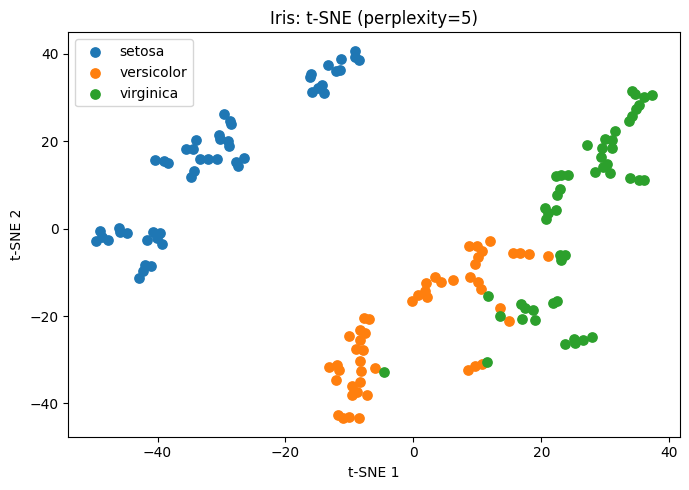

  Saved: plots_q2/iris_tsne_perp5.png
  perplexity= 5  silhouette=0.427


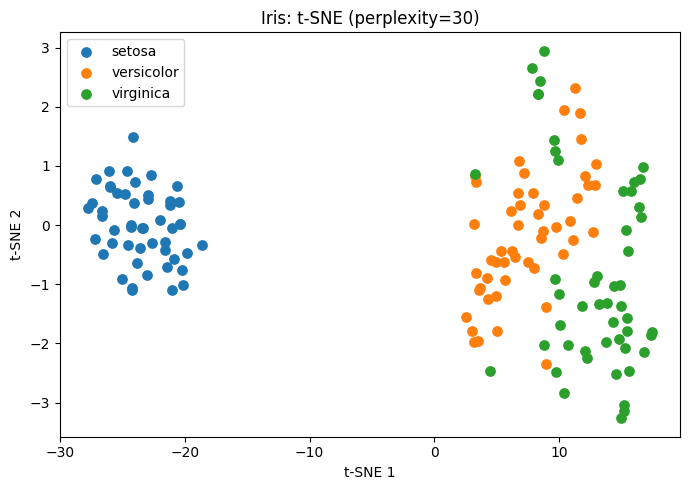

  Saved: plots_q2/iris_tsne_perp30.png
  perplexity=30  silhouette=0.494


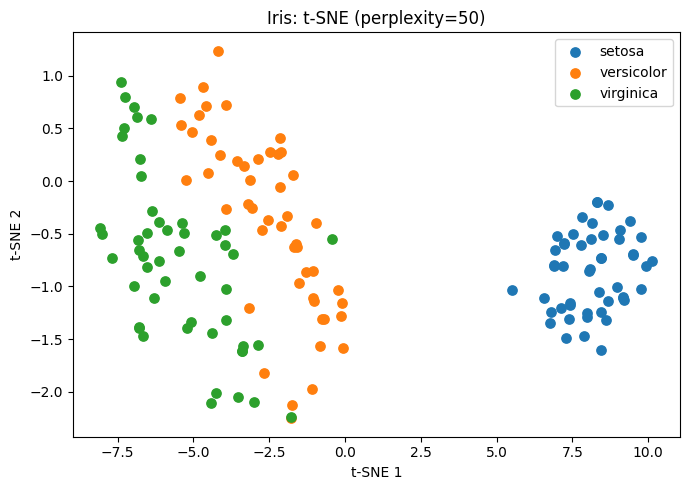

  Saved: plots_q2/iris_tsne_perp50.png
  perplexity=50  silhouette=0.507

How to describe changes in your report (typical patterns):
- Low perplexity (e.g., 5): emphasizes very local neighborhoods; can fragment clusters into smaller islands.
- Medium (e.g., 30): often balances local/global structure; commonly gives cleanest separation on Iris.
- High (e.g., 50): pushes more global structure; can compress or mix classes if dataset is small.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

OUT_DIR = "plots_q2"
os.makedirs(OUT_DIR, exist_ok=True)

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_scaled = StandardScaler().fit_transform(X)

perplexities = [5, 30, 50]

print("Perplexity comparison (higher silhouette ~= better separation on the 2D embedding):")
for perp in perplexities:
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        init="pca",
        learning_rate="auto",
        random_state=42
    )
    X_2d = tsne.fit_transform(X_scaled)

    plt.figure(figsize=(7, 5))
    for cls in np.unique(y):
        plt.scatter(X_2d[y == cls, 0], X_2d[y == cls, 1], s=45, label=target_names[cls])
    plt.title(f"Iris: t-SNE (perplexity={perp})")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend()
    plt.tight_layout()

    out_path = os.path.join(OUT_DIR, f"iris_tsne_perp{perp}.png")
    plt.savefig(out_path, dpi=200)
    plt.show()
    print(f"  Saved: {out_path}")
    sil = silhouette_score(X_2d, y)
    print(f"  perplexity={perp:>2}  silhouette={sil:.3f}")

print("\nHow to describe changes in your report (typical patterns):")
print("- Low perplexity (e.g., 5): emphasizes very local neighborhoods; can fragment clusters into smaller islands.")
print("- Medium (e.g., 30): often balances local/global structure; commonly gives cleanest separation on Iris.")
print("- High (e.g., 50): pushes more global structure; can compress or mix classes if dataset is small.")


3. Run PCA + t-SNE on MNIST: first reduce to 50 dimensions with PCA, then apply t-SNE to 2D and visualize.

Explained variance ratio (sum) for 50 PCs: 0.8283696174621582


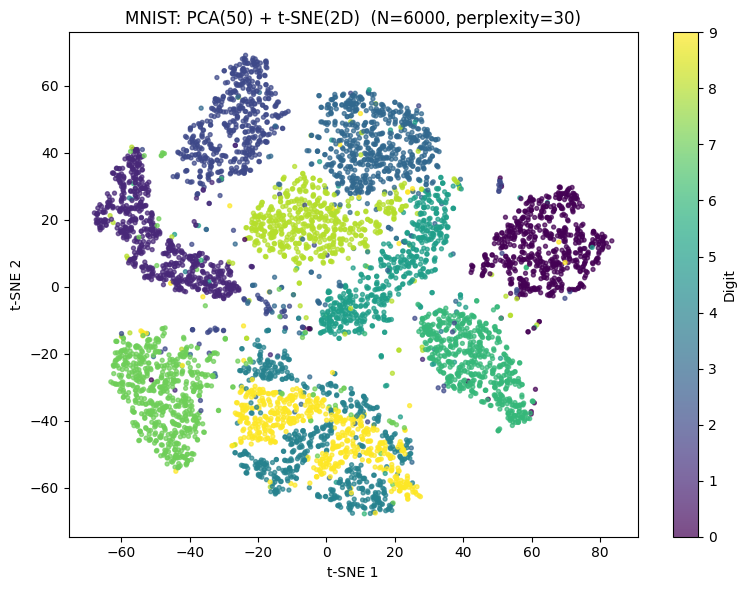

Saved: plots_q3/mnist_pca50_tsne2d_N6000_perp30.png


'\nFallback (no internet) options:\n1) Use tensorflow/keras if available:\n   from tensorflow.keras.datasets import mnist\n   (X_train, y_train), (X_test, y_test) = mnist.load_data()\n   X = X_train.reshape(-1, 784).astype(np.float32) / 255.0\n   y = y_train\n\n2) Use sklearn digits dataset (8x8) as a small substitute:\n   from sklearn.datasets import load_digits\n   digits = load_digits()\n   X = digits.data / 16.0\n   y = digits.target\n'

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_openml

OUT_DIR = "plots_q3"
os.makedirs(OUT_DIR, exist_ok=True)
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)

N = 6000
rng = np.random.default_rng(42)
idx = rng.choice(len(X), size=N, replace=False)
X = X[idx]
y = y[idx]

X = X / 255.0

pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)

print("Explained variance ratio (sum) for 50 PCs:", float(np.sum(pca.explained_variance_ratio_)))

tsne = TSNE(
    n_components=2,
    perplexity=30,
    init="pca",
    learning_rate="auto",
    random_state=42
)
X_2d = tsne.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
sc = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=8, alpha=0.7)
plt.title(f"MNIST: PCA(50) + t-SNE(2D)  (N={N}, perplexity=30)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
cbar = plt.colorbar(sc)
cbar.set_label("Digit")
plt.tight_layout()

out_path = os.path.join(OUT_DIR, f"mnist_pca50_tsne2d_N{N}_perp30.png")
plt.savefig(out_path, dpi=200)
plt.show()

print(f"Saved: {out_path}")

"""
Fallback (no internet) options:
1) Use tensorflow/keras if available:
   from tensorflow.keras.datasets import mnist
   (X_train, y_train), (X_test, y_test) = mnist.load_data()
   X = X_train.reshape(-1, 784).astype(np.float32) / 255.0
   y = y_train

2) Use sklearn digits dataset (8x8) as a small substitute:
   from sklearn.datasets import load_digits
   digits = load_digits()
   X = digits.data / 16.0
   y = digits.target
"""
